In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('homeprices_banglore.csv')
df.head(4)

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00


In [3]:
sx = MinMaxScaler()
sy = MinMaxScaler()
X_scaled = sx.fit_transform(df[['area', 'bedrooms']])
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

X_scaled, y_scaled

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def logloss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

Batch Gradient Descent Method

In [6]:
def batch_gradient_descent(X, y, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_pred = np.dot(w,X_scaled.T)+b
        w_der = -(2/total_samples) *( X.T.dot (y-y_pred))
        b_der = -(2/total_samples) * np.sum(y-y_pred)
        
        w = w -learning_rate * w_der
        b = b - learning_rate * b_der
        
        cost = np.mean(np.square(y - y_pred))
        if( i % 10 == 0):
           cost_list.append(cost)
           epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
        

In [7]:
w,b, cost,cost_list, epoch = batch_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0, 0.5, 'Cost')

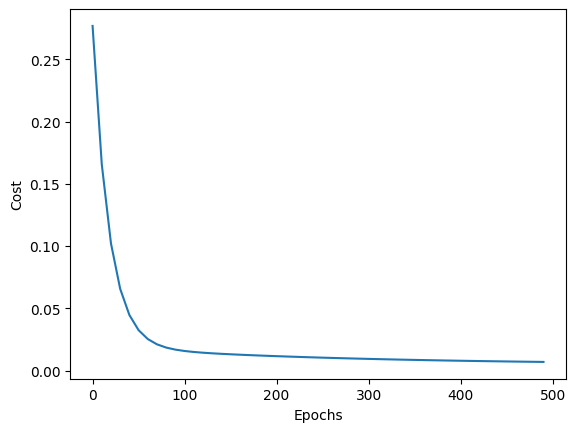

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(epoch, cost_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [9]:
def predict_price(area, bedrooms, w, b):
    X_scaled = sx.transform([[area, bedrooms]])[0]
    y_scaled = w[0]*X_scaled[0] + w[1]*X_scaled[1] + b
    return sy.inverse_transform([[y_scaled]])

In [10]:
predict_price(2600, 4, w, b)

array([[128.45484403]])

In [11]:
predict_price(1000, 2, w, b)

array([[30.25309446]])

Stochastic Gradient Descent Method

In [12]:
import random

In [13]:
def stochastic_gradient_descent(X, y, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
   
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples - 1)
        sample_X = X[random_index]
        sample_y = y[random_index]
        y_pred = np.dot(w, sample_X.T) + b
        w_der = -(2/total_samples) * (sample_X.T.dot(sample_y - y_pred))
        b_der = -(2/total_samples) * (sample_y - y_pred)
        w = w - learning_rate * w_der
        b = b - learning_rate * b_der
        
        cost =np.mean(np.square(y - y_pred))
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [14]:
w_sgd,b_sgd ,cost_sgd, cost_list_sgd,epoch_list_sgd= stochastic_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 10000)
w_sgd,b_sgd, cost_sgd

(array([0.70946329, 0.6750248 ]), -0.22749065629931867, 0.19472216362291658)

In [15]:
def predicted_price_stochastic(area, bedrooms, w, b):
    X_scaled = sx.transform([[area, bedrooms]])[0]
    y_scaled = w[0]*X_scaled[0] + w[1]*X_scaled[1] + b
    return sy.inverse_transform([[y_scaled]])

In [16]:
predict_price(2600, 4, w_sgd, b_sgd)

array([[129.08315386]])

Text(0, 0.5, 'Cost')

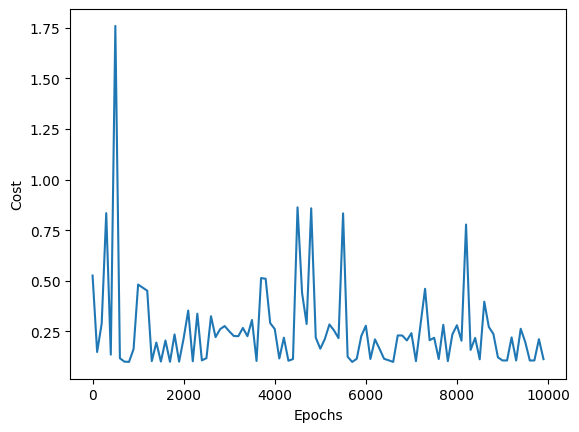

In [17]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')

Mini Gradient Descent Method

In [18]:
np.random.permutation(10)

array([1, 0, 5, 7, 3, 2, 9, 6, 4, 8])

In [19]:
def mini_gradient_descent(X, y, epochs=100, batches=5, learning_rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    if total_samples < batches:
        batches = total_samples
    cost_list = []
    epoch_list = []
    number_of_batches = int(total_samples/batches)
    
    for i in range(epochs):
        random_index = np.random.permutation(total_samples)
        batch_X = X[random_index]
        batch_y = y[random_index]
        
        for j in range(0,total_samples, number_of_batches):
            X_tmp = batch_X[j:j+batches]
            y_tmp = batch_y[j:j+batches]
            y_pred = np.dot(w,X_tmp.T) + b
            
            w_der = -(2/batches) * (X_tmp.T.dot(y_tmp - y_pred))
            b_der = -(2/batches) * np.sum(y_tmp - y_pred)
            
            w = w - learning_rate * w_der
            b = b - learning_rate * b_der
            
            cost = np.mean(np.square(y_tmp - y_pred))
       
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [20]:
w_mgd,b_mgd ,cost_mgd, cost_list_mgd,epoch_list_mgd= mini_gradient_descent(X_scaled, y_scaled.reshape(y_scaled.shape[0],),100, 5)
w_mgd,b_mgd, cost_mgd

(array([0.70795204, 0.67682321]), -0.23122610764213772, 0.0034258932261501565)

In [21]:
predict_price(2600, 4, w_mgd, b_mgd)

array([[128.63432425]])

In [22]:
predict_price(1500, 3, w_mgd, b_mgd)

array([[69.53951384]])

Text(0, 0.5, 'Cost')

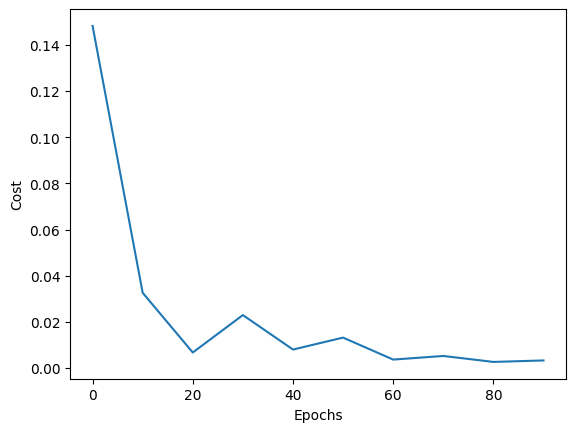

In [23]:
plt.plot(epoch_list_mgd, cost_list_mgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')